<a href="https://colab.research.google.com/github/shionguha/inf2178-expdesignfordatascience-w23/blob/main/notebooks/anova.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.datasets import load_wine

# Load the dataset
wine = load_wine()

In [2]:
import pandas as pd

#
# Convert into a data frame
#
# Extract the data
data = pd.DataFrame(wine['data'], columns=wine['feature_names'])
# Extract the target
target = pd.DataFrame(wine['target'], columns=['cultivator'])
# Combine into one dataset
df = pd.concat([target, data], axis='columns')

In [ ]:
# Trim the data
df = df[['cultivator', 'total_phenols']]

# Display the first 5 columns
print(df.head())

In [4]:
# Number of rows
print(df.shape[0])

178


In [5]:
# Cultivators' names
print(df['cultivator'].unique())

[0 1 2]


Text(0, 0.5, 'Total Phenols')

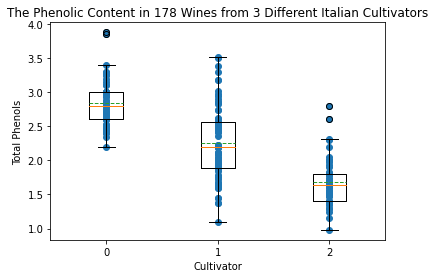

In [6]:
import matplotlib.pyplot as plt

# Plot
grouped_data = df.groupby('cultivator')['total_phenols'].apply(list)
plt.boxplot(grouped_data, positions=range(0, len(df['cultivator'].unique())), showmeans=True, meanline=True)
plt.scatter(df['cultivator'], df['total_phenols'])
plt.title('The Phenolic Content in 178 Wines from 3 Different Italian Cultivators')
plt.xlabel('Cultivator')
plt.ylabel('Total Phenols')

In [7]:
# Samples
sample_0 = df[df['cultivator'] == 0]['total_phenols']
sample_1 = df[df['cultivator'] == 1]['total_phenols']
sample_2 = df[df['cultivator'] == 2]['total_phenols']

In [8]:
from scipy.stats import f_oneway

# One-way ANOVA
statistic, pvalue = f_oneway(sample_0, sample_1, sample_2)

print(f'One-way ANOVA: s = {statistic}, p = {pvalue}')

One-way ANOVA: s = 93.73300962036718, p = 2.1376700154385954e-28


In [9]:
def get_significance(p):
    """Returns the significance of a p-values as a string of stars."""
    if p <= 0.001:
        return '***'
    elif p <= 0.01:
        return '**'
    elif p <= 0.05:
        return '*'
    elif p <= 0.1:
        return '.'
    else:
        return ''


def round_p_value(p):
    """Round a small p-value so that it is human-readable."""
    if p < 0.001:
        return '<0.001'
    else:
        return f'{p:5.3}'


p_rounded = round_p_value(pvalue)
significance = get_significance(pvalue)
print(f'The p-value is {p_rounded} ({significance})')

The p-value is <0.001 (***)


In [10]:
#1 way anova with tukey hsd
import pandas as pd
import numpy as np
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [12]:
#enter data for three groups
a = [85, 86, 88, 75, 78, 94, 98, 79, 71, 80]
b = [91, 92, 93, 90, 97, 94, 82, 88, 95, 96]
c = [79, 78, 88, 94, 92, 85, 83, 85, 82, 81]

#perform one-way ANOVA
f_oneway(a, b, c)

F_onewayResult(statistic=5.167774552944481, pvalue=0.012582197136592609)

In [13]:
#create DataFrame to hold data
df = pd.DataFrame({'score': [85, 86, 88, 75, 78, 94, 98, 79, 71, 80,
                             91, 92, 93, 90, 97, 94, 82, 88, 95, 96,
                             79, 78, 88, 94, 92, 85, 83, 85, 82, 81],
                   'group': np.repeat(['a', 'b', 'c'], repeats=10)}) 

# perform Tukey's test
tukey = pairwise_tukeyhsd(endog=df['score'],
                          groups=df['group'],
                          alpha=0.05)

#display results
print(tukey)


 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
     a      b      8.4 0.0158   1.4272 15.3728   True
     a      c      1.3 0.8864  -5.6728  8.2728  False
     b      c     -7.1 0.0453 -14.0728 -0.1272   True
-----------------------------------------------------


In [15]:
#2 way anova
import numpy as np
import pandas as pd

#create data
df = pd.DataFrame({'water': np.repeat(['daily', 'weekly'], 15),
                   'sun': np.tile(np.repeat(['low', 'med', 'high'], 5), 2),
                   'height': [6, 6, 6, 5, 6, 5, 5, 6, 4, 5,
                              6, 6, 7, 8, 7, 3, 4, 4, 4, 5,
                              4, 4, 4, 4, 4, 5, 6, 6, 7, 8]})

#view first ten rows of data 
df[:10]



,water,sun,height
0,daily,low,6
1,daily,low,6
2,daily,low,6
3,daily,low,5
4,daily,low,6
5,daily,med,5
6,daily,med,5
7,daily,med,6
8,daily,med,4
9,daily,med,5


In [16]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

#perform two-way ANOVA
model = ols('height ~ C(water) + C(sun) + C(water):C(sun)', data=df).fit()
sm.stats.anova_lm(model, typ=2)

,sum_sq,df,F,PR(>F)
C(water),8.533333,1.0,16.0000,0.000527
C(sun),24.866667,2.0,23.3125,0.000002
C(water):C(sun),2.466667,2.0,2.3125,0.120667
Residual,12.800000,24.0,NaN,NaN


In [24]:
#interaction plots in 2 way anova
import pandas as pd
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.graphics.factorplots import interaction_plot
import matplotlib.pyplot as plt
from scipy import stats


In [35]:
datafile = "https://raw.githubusercontent.com/shionguha/inf2178-expdesignfordatascience-w23/main/data/ToothGrowth.csv"


In [36]:
data = pd.read_csv(datafile)

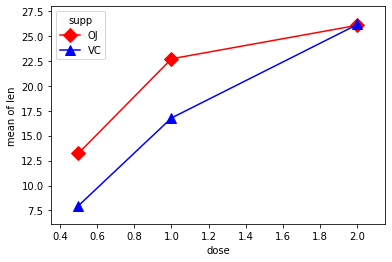

In [37]:
fig = interaction_plot(data.dose, data.supp, data.len,
             colors=['red','blue'], markers=['D','^'], ms=10)

In [38]:
#full example using 2 way anova
import pandas as pd
import seaborn as sns
# load data file
d = pd.read_csv("https://reneshbedre.github.io/assets/posts/anova/twowayanova.txt", sep="\t")
# reshape the d dataframe suitable for statsmodels package 
# you do not need to reshape if your data is already in stacked format. Compare d and d_melt tables for detail 
# understanding 
d_melt = pd.melt(d, id_vars=['Genotype'], value_vars=['1_year', '2_year', '3_year'])
# replace column names
d_melt.columns = ['Genotype', 'years', 'value']
d_melt.head()
# output

,Genotype,years,value
0,A,1_year,1.53
1,A,1_year,1.83
2,A,1_year,1.38
3,B,1_year,3.60
4,B,1_year,2.94


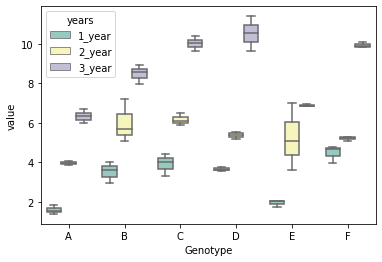

In [39]:
# generate a boxplot to see the data distribution by genotypes and years. Using boxplot, we can easily detect the 
# differences between different groups
sns.boxplot(x="Genotype", y="value", hue="years", data=d_melt, palette="Set3") 

In [40]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
model = ols('value ~ C(Genotype) + C(years) + C(Genotype):C(years)', data=d_melt).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table
# output

,sum_sq,df,F,PR(>F)
C(Genotype),58.551733,5.0,32.748581,1.931655e-12
C(years),278.925633,2.0,390.014868,4.006243e-25
C(Genotype):C(years),17.122967,10.0,4.788525,2.230094e-04
Residual,12.873000,36.0,NaN,NaN


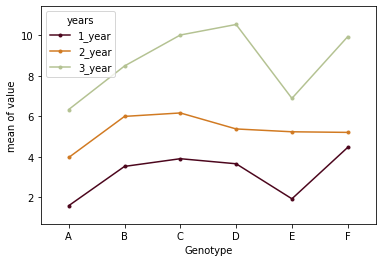

In [42]:
from statsmodels.graphics.factorplots import interaction_plot
import matplotlib.pyplot as plt
fig = interaction_plot(x=d_melt['Genotype'], trace=d_melt['years'], response=d_melt['value'], 
    colors=['#4c061d','#d17a22', '#b4c292'])
plt.show()
